# Decision Tree (Trafic Accident Prediction)

## Penjelasan Kolom:

###
- Weather = Kondisi cuaca saat kecelakaan terjadi atau diamati (misalnya: Cerah, Hujan, Berkabut).
- Road_Type = Jenis jalan lokasi kejadian (misalnya: Jalan Tol (Highway), Jalan Kota (City Road), Jalan Pedesaan (Rural Road)).
- Time_of_Day = Waktu kejadian (Pagi, Siang, Sore, Malam).
- Traffic_Density = Tingkat kepadatan lalu lintas di lokasi tersebut.
- Speed_Limit = Batas kecepatan resmi yang diberlakukan di jalan tersebut.
- Number_of_Vehicles = Jumlah total kendaraan yang terlibat dalam insiden (atau yang diamati di lokasi).
- Driver_Alcohol = Indikasi biner apakah pengemudi berada di bawah pengaruh alkohol (1.0 = Ya, 0.0 = Tidak).
- Accident_Severity = Tingkat keparahan kecelakaan (misalnya: Rendah, Sedang, Tinggi).
- Road_Condition = Kondisi fisik permukaan jalan (misalnya: Kering, Basah, Beres).
- Vehicle_Type = Jenis kendaraan utama yang terlibat dalam kejadian (misalnya: Mobil, Truk, Bus).
- Driver_Age = Usia pengemudi yang terlibat.
- Driver_Experience = Pengalaman mengemudi pengemudi (dinyatakan dalam tahun).
- Road_Light_Condition = Kondisi pencahayaan di jalan saat kejadian (misalnya: Siang Hari, Cahaya Buatan, Tidak Ada Cahaya).
- Accident (Variabel Target) = Menunjukkan apakah peristiwa tersebut mengakibatkan kecelakaan (1.0) atau tidak (0.0).



## A. Data Preparation

### A.1 Import Libraries

In [41]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

plt.style.use('ggplot')
sns.set(style='darkgrid', font_scale=1.1)

### A.2 Load Data

In [42]:
try:
    df = pd.read_csv('dataset_traffic_accident_prediction1.csv')
    print("Berhasil membaca csv")
except Exception as e:
    print("Gagal membaca data")

Berhasil membaca csv


### A.3 Melihat 5 Data Teratas dan 5 Data Terbawah

In [43]:
df.head()

,Weather,Road_Type,Time_of_Day,Traffic_Density,Speed_Limit,Number_of_Vehicles,Driver_Alcohol,Accident_Severity,Road_Condition,Vehicle_Type,Driver_Age,Driver_Experience,Road_Light_Condition,Accident
0,Rainy,City Road,Morning,1.0,100.0,5.0,0.0,NaN,Wet,Car,51.0,48.0,Artificial Light,0.0
1,Clear,Rural Road,Night,NaN,120.0,3.0,0.0,Moderate,Wet,Truck,49.0,43.0,Artificial Light,0.0
2,Rainy,Highway,Evening,1.0,60.0,4.0,0.0,Low,Icy,Car,54.0,52.0,Artificial Light,0.0
3,Clear,City Road,Afternoon,2.0,60.0,3.0,0.0,Low,Under Construction,Bus,34.0,31.0,Daylight,0.0
4,Rainy,Highway,Morning,1.0,195.0,11.0,0.0,Low,Dry,Car,62.0,55.0,Artificial Light,1.0


In [44]:
df.tail()

,Weather,Road_Type,Time_of_Day,Traffic_Density,Speed_Limit,Number_of_Vehicles,Driver_Alcohol,Accident_Severity,Road_Condition,Vehicle_Type,Driver_Age,Driver_Experience,Road_Light_Condition,Accident
835,Clear,Highway,Night,2.0,30.0,4.0,0.0,Low,Dry,Car,23.0,15.0,Daylight,0.0
836,Rainy,Rural Road,Evening,2.0,60.0,4.0,0.0,Low,Dry,Motorcycle,52.0,46.0,Daylight,1.0
837,Foggy,Highway,Evening,NaN,30.0,4.0,1.0,High,Dry,Car,NaN,34.0,Artificial Light,NaN
838,Foggy,Highway,Afternoon,2.0,60.0,3.0,0.0,Low,Dry,Car,25.0,19.0,Artificial Light,0.0
839,Clear,Highway,Afternoon,1.0,60.0,4.0,0.0,Low,Dry,Motorcycle,29.0,21.0,Artificial Light,0.0


### A.4 Melihat Informasi Data

In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 840 entries, 0 to 839
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Weather               798 non-null    object 
 1   Road_Type             798 non-null    object 
 2   Time_of_Day           798 non-null    object 
 3   Traffic_Density       798 non-null    float64
 4   Speed_Limit           798 non-null    float64
 5   Number_of_Vehicles    798 non-null    float64
 6   Driver_Alcohol        798 non-null    float64
 7   Accident_Severity     798 non-null    object 
 8   Road_Condition        798 non-null    object 
 9   Vehicle_Type          798 non-null    object 
 10  Driver_Age            798 non-null    float64
 11  Driver_Experience     798 non-null    float64
 12  Road_Light_Condition  798 non-null    object 
 13  Accident              798 non-null    float64
dtypes: float64(7), object(7)
memory usage: 92.0+ KB


### A.5 Melihat Dimensi Data

In [46]:
df.shape

(840, 14)

### A.6 Cek Data Duplikat

In [47]:
df.duplicated().sum()

np.int64(14)

In [48]:
df.drop_duplicates(inplace=True)

### A.7 Cek Data Hilang

In [49]:
df.isna().sum()

Weather                 42
Road_Type               42
Time_of_Day             41
Traffic_Density         42
Speed_Limit             42
Number_of_Vehicles      42
Driver_Alcohol          42
Accident_Severity       41
Road_Condition          42
Vehicle_Type            42
Driver_Age              42
Driver_Experience       42
Road_Light_Condition    42
Accident                42
dtype: int64

In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 826 entries, 0 to 839
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Weather               784 non-null    object 
 1   Road_Type             784 non-null    object 
 2   Time_of_Day           785 non-null    object 
 3   Traffic_Density       784 non-null    float64
 4   Speed_Limit           784 non-null    float64
 5   Number_of_Vehicles    784 non-null    float64
 6   Driver_Alcohol        784 non-null    float64
 7   Accident_Severity     785 non-null    object 
 8   Road_Condition        784 non-null    object 
 9   Vehicle_Type          784 non-null    object 
 10  Driver_Age            784 non-null    float64
 11  Driver_Experience     784 non-null    float64
 12  Road_Light_Condition  784 non-null    object 
 13  Accident              784 non-null    float64
dtypes: float64(7), object(7)
memory usage: 96.8+ KB


In [51]:
df.columns

Index(['Weather', 'Road_Type', 'Time_of_Day', 'Traffic_Density', 'Speed_Limit',
       'Number_of_Vehicles', 'Driver_Alcohol', 'Accident_Severity',
       'Road_Condition', 'Vehicle_Type', 'Driver_Age', 'Driver_Experience',
       'Road_Light_Condition', 'Accident'],
      dtype='object')

In [52]:
df.dropna(subset=['Accident'], inplace=True)

In [53]:
obj_cols = ['Weather', 'Road_Type', 'Time_of_Day', 'Accident_Severity',
       'Road_Condition', 'Vehicle_Type','Road_Light_Condition']
for col in obj_cols:
    modus = df[col].mode()[0]
    df[col] = df[col].fillna(modus)

In [54]:
num_cols = ['Traffic_Density', 'Speed_Limit', 'Number_of_Vehicles', 
            'Driver_Alcohol', 'Driver_Age', 'Driver_Experience']
for col in num_cols:
    median = df[col].median()
    df[col] = df[col].fillna(median)

In [55]:
df.isna().sum()

Weather                 0
Road_Type               0
Time_of_Day             0
Traffic_Density         0
Speed_Limit             0
Number_of_Vehicles      0
Driver_Alcohol          0
Accident_Severity       0
Road_Condition          0
Vehicle_Type            0
Driver_Age              0
Driver_Experience       0
Road_Light_Condition    0
Accident                0
dtype: int64

## B. Data Preprocessing


### B.1 Cek Outliers

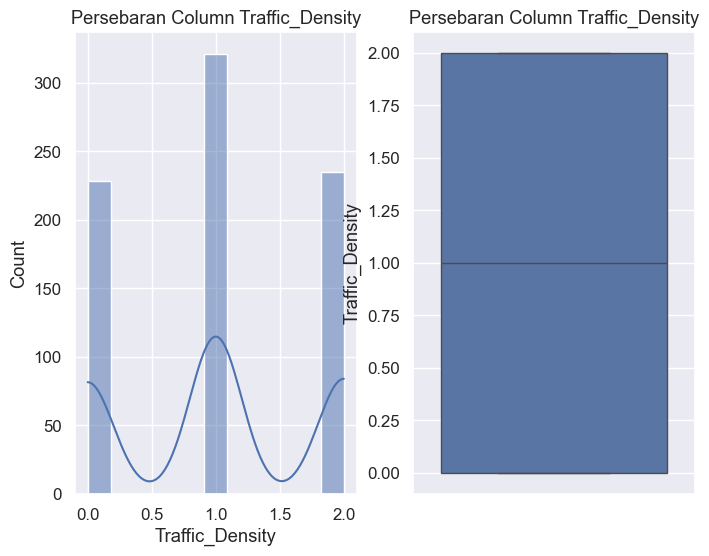

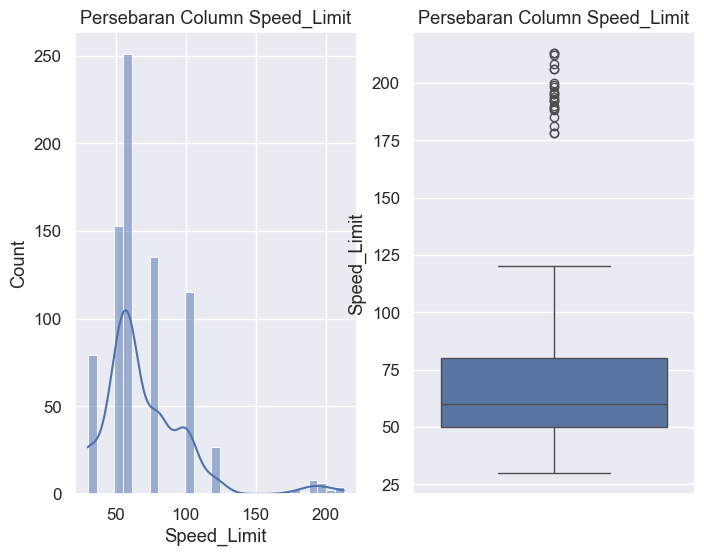

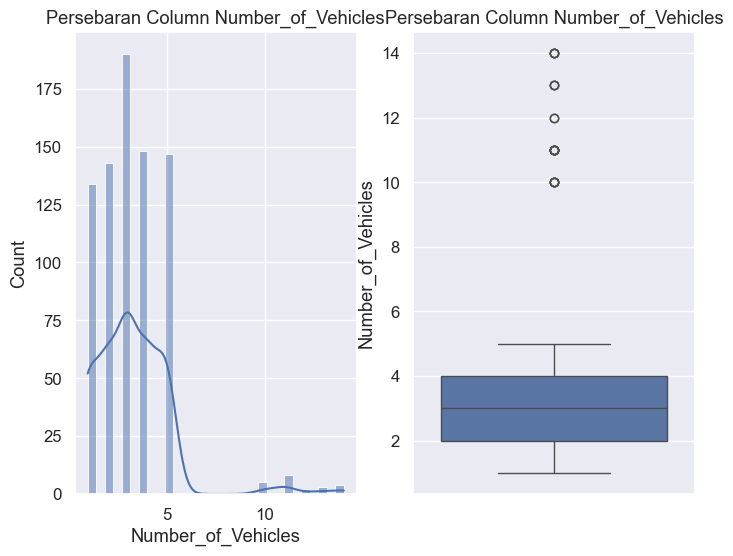

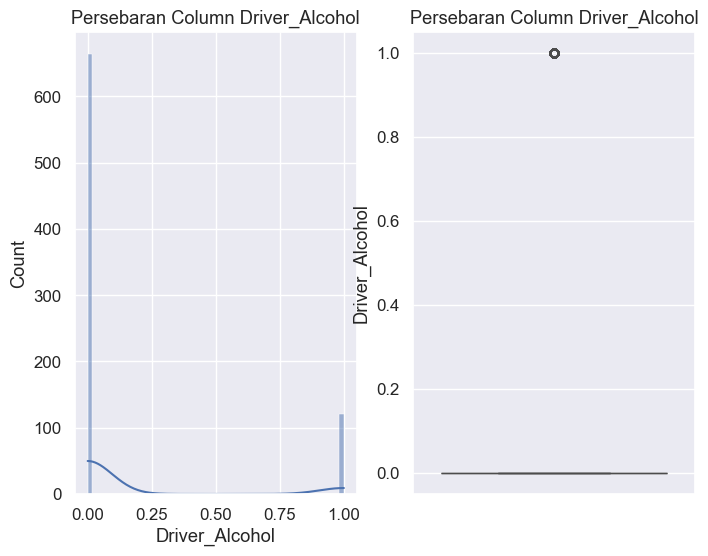

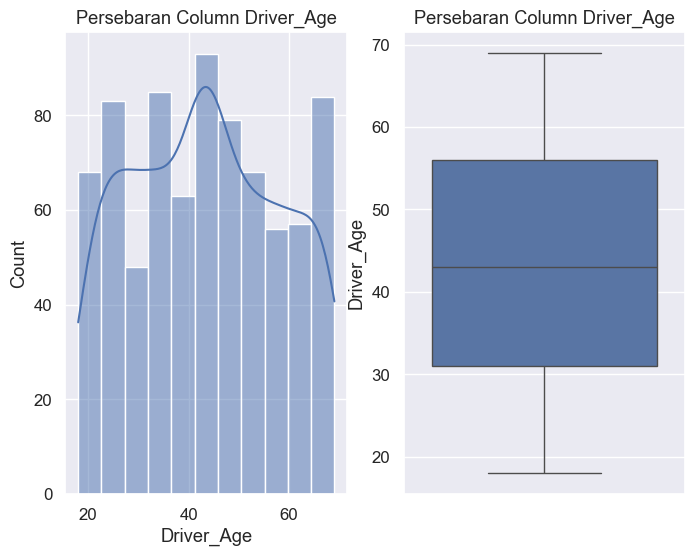

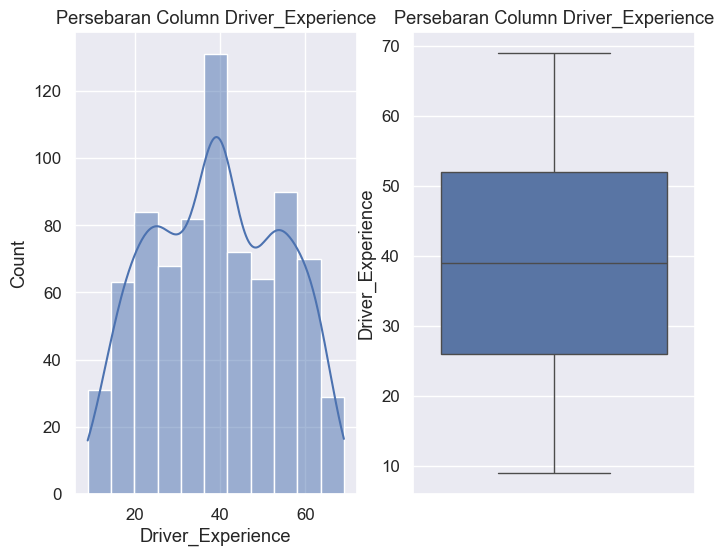

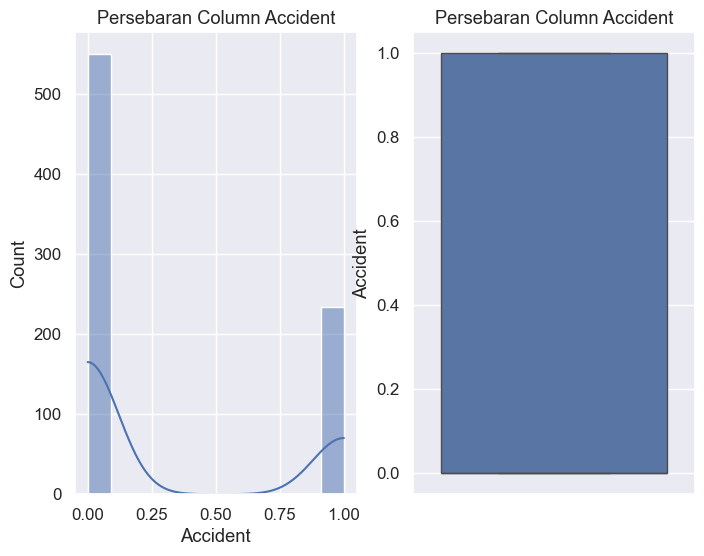

In [56]:
for col in df.select_dtypes(include='number'):
    fig, axes = plt.subplots(1, 2, figsize=(8,6))
    sns.histplot(df[col], ax=axes[0], kde=True)
    axes[0].set_title(f"Persebaran Column {col}")
    sns.boxplot(df[col], ax=axes[1])
    axes[1].set_title(f"Persebaran Column {col}")
    
    plt.show()

### B.2 Resampling Label

In [57]:
df_major = df[df['Accident'] == 0]
df_minor = df[df['Accident'] == 1]

target_outcome = len(df_major)

df_minor_oversampled = df_minor.sample(n=target_outcome, replace=True, random_state=42)

df = pd.concat([df_major, df_minor_oversampled])

## C. Exploratory Data Analysis (EDA)

### C.1 Univariate Analysis

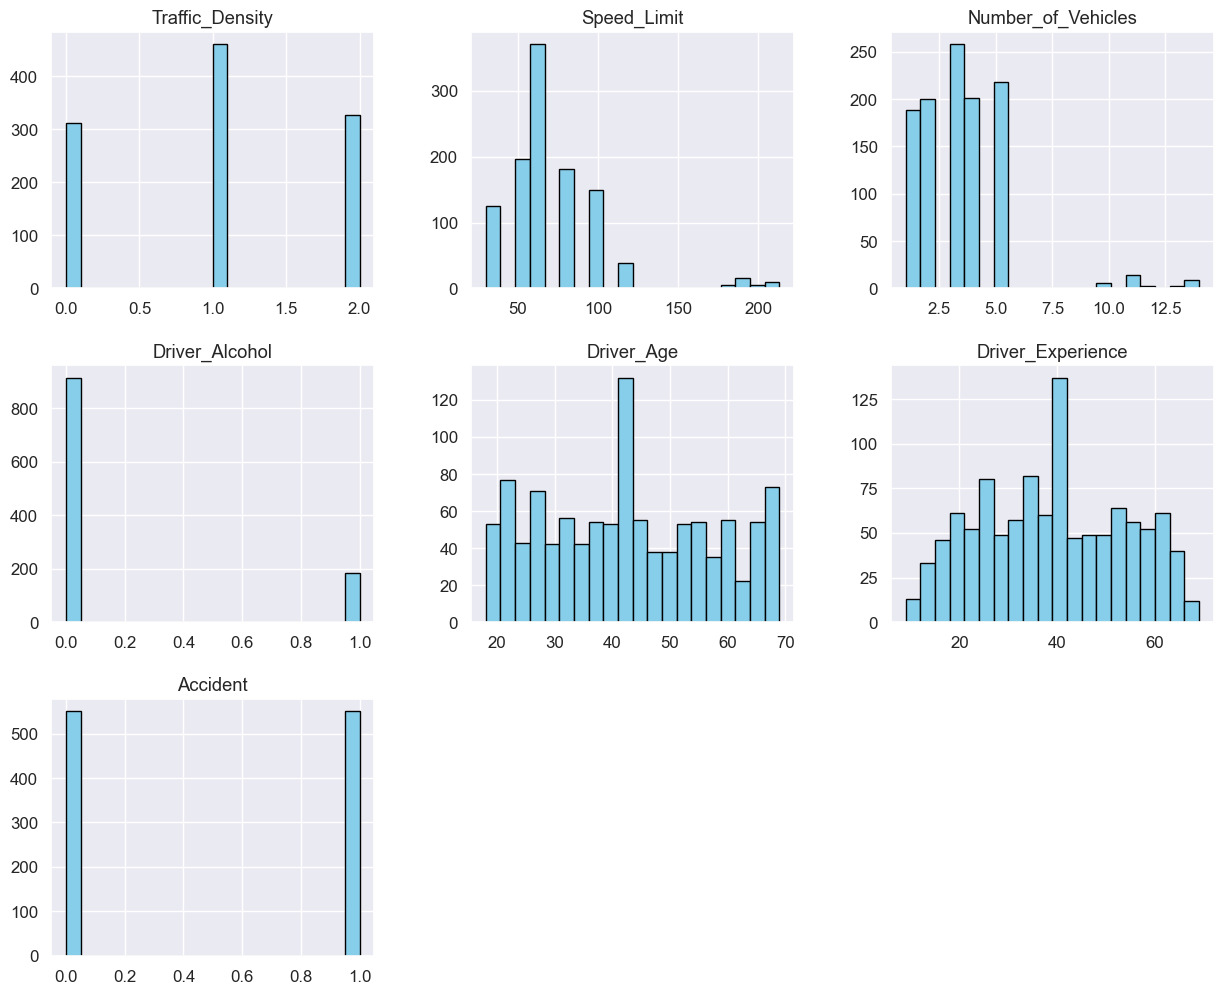

In [58]:
num = df.select_dtypes(include='number')
num.hist(bins=20, color='skyblue', edgecolor='black', figsize=(15, 12))
plt.show()

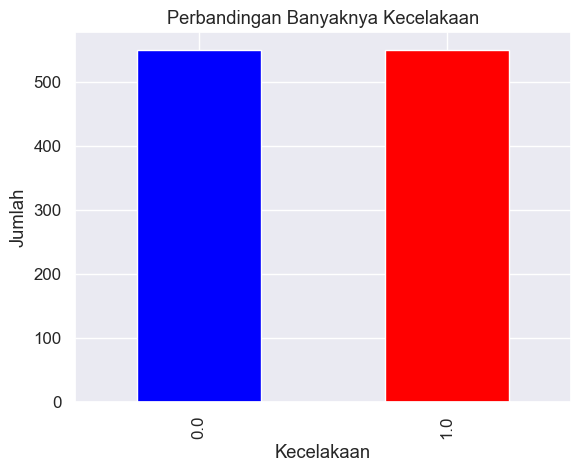

In [59]:
df['Accident'].value_counts().plot(kind='bar', color=['blue', 'red'])
plt.title("Perbandingan Banyaknya Kecelakaan")
plt.xlabel("Kecelakaan")
plt.ylabel("Jumlah")
plt.show()

### C.2 Bivariate Analysis

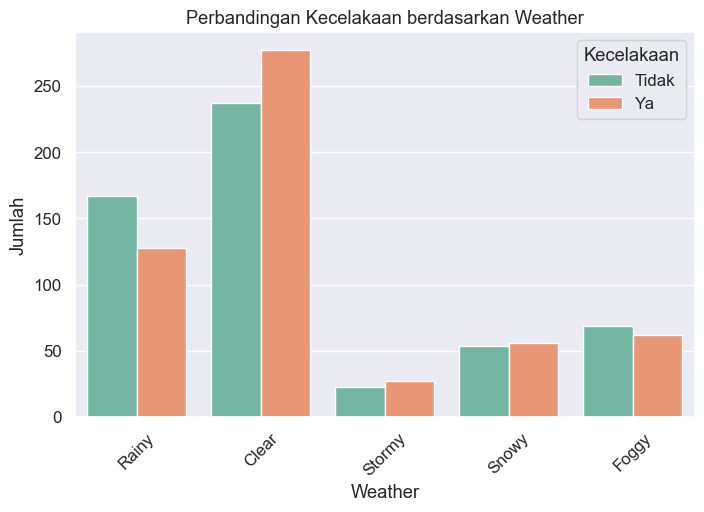

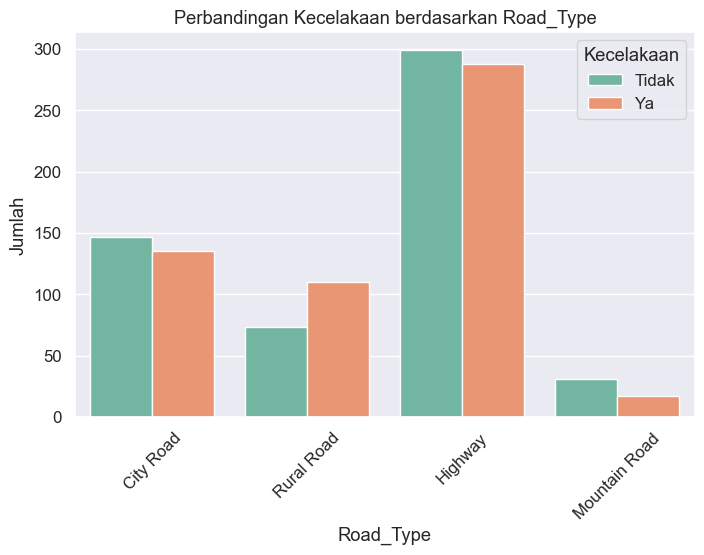

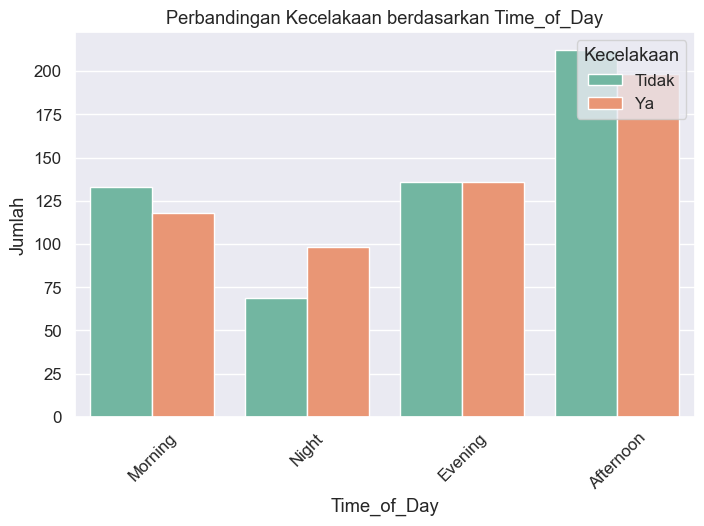

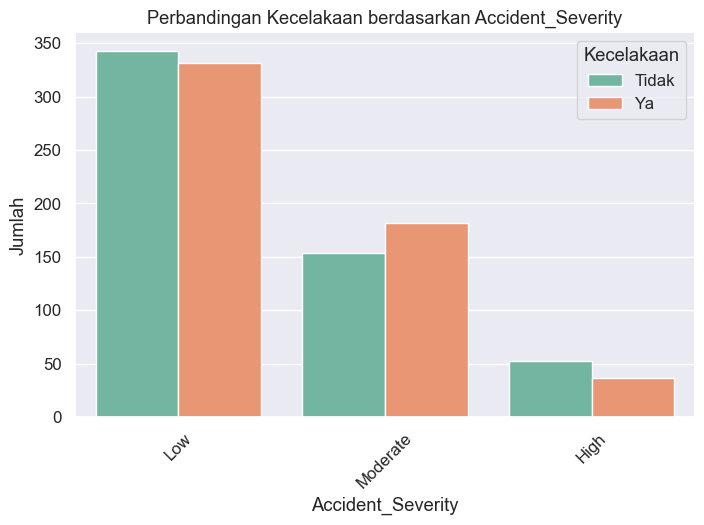

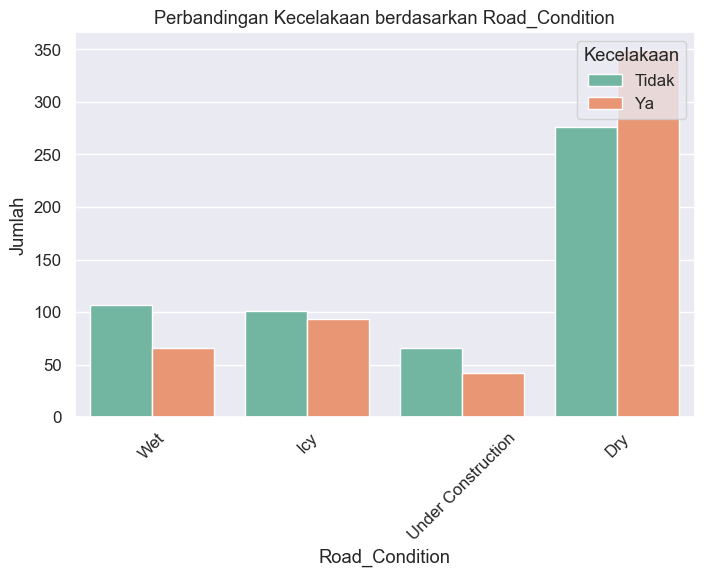

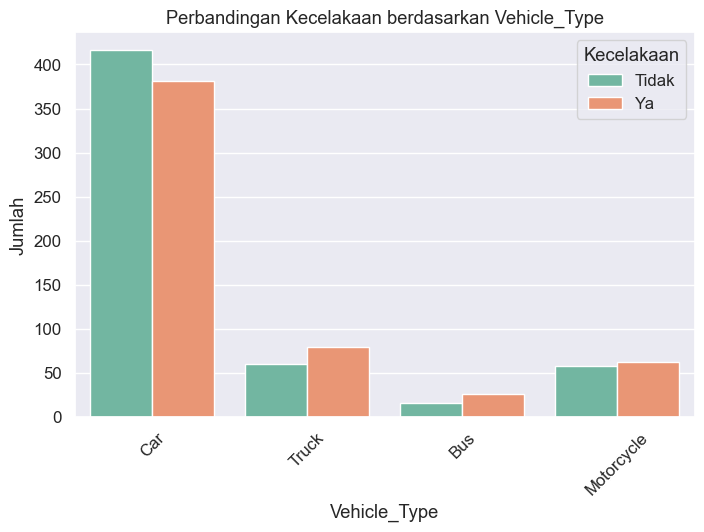

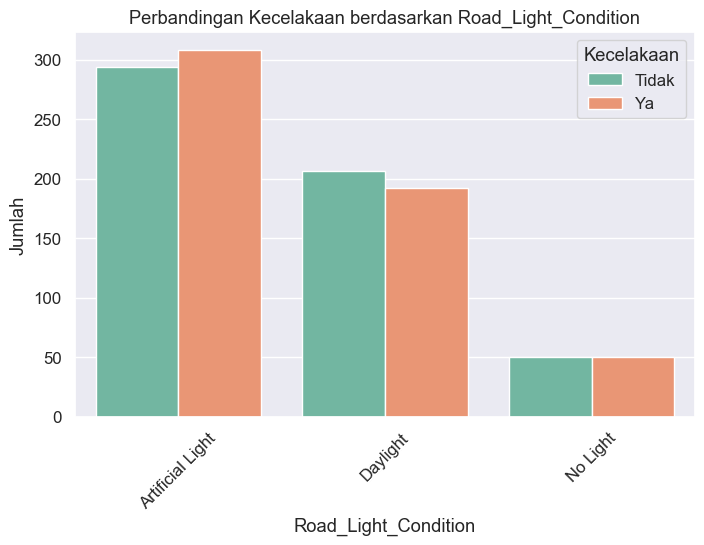

In [60]:
for col in df.select_dtypes(include='object'):
    plt.figure(figsize=(8, 5))
    sns.countplot(data=df, x=col, hue='Accident', palette='Set2')
    plt.title(f'Perbandingan Kecelakaan berdasarkan {col}')
    plt.xlabel(col)
    plt.ylabel('Jumlah')    
    plt.xticks(rotation=45)
    plt.legend(title='Kecelakaan', loc='upper right', labels=['Tidak', 'Ya'])
plt.show()

### C.3 Encoding/Mapping

In [61]:
df.columns

Index(['Weather', 'Road_Type', 'Time_of_Day', 'Traffic_Density', 'Speed_Limit',
       'Number_of_Vehicles', 'Driver_Alcohol', 'Accident_Severity',
       'Road_Condition', 'Vehicle_Type', 'Driver_Age', 'Driver_Experience',
       'Road_Light_Condition', 'Accident'],
      dtype='object')

In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1100 entries, 0 to 166
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Weather               1100 non-null   object 
 1   Road_Type             1100 non-null   object 
 2   Time_of_Day           1100 non-null   object 
 3   Traffic_Density       1100 non-null   float64
 4   Speed_Limit           1100 non-null   float64
 5   Number_of_Vehicles    1100 non-null   float64
 6   Driver_Alcohol        1100 non-null   float64
 7   Accident_Severity     1100 non-null   object 
 8   Road_Condition        1100 non-null   object 
 9   Vehicle_Type          1100 non-null   object 
 10  Driver_Age            1100 non-null   float64
 11  Driver_Experience     1100 non-null   float64
 12  Road_Light_Condition  1100 non-null   object 
 13  Accident              1100 non-null   float64
dtypes: float64(7), object(7)
memory usage: 128.9+ KB


In [63]:
df['Weather'].unique()

array(['Rainy', 'Clear', 'Stormy', 'Snowy', 'Foggy'], dtype=object)

In [64]:
weather_mapping = {'Rainy' : 0, 'Clear' : 1, 'Foggy' : 2, 'Stormy' : 3, 'Snowy' : 4}

df['Weather'] = df['Weather'].map(weather_mapping)

In [65]:
df['Road_Type'].unique()

array(['City Road', 'Rural Road', 'Highway', 'Mountain Road'],
      dtype=object)

In [66]:
Road_mapping = {'City Road' : 0, 'Rural Road' : 1, 'Highway' : 2, 'Mountain Road' : 3}

df['Road_Type'] = df['Road_Type'].map(Road_mapping)

In [67]:
df['Time_of_Day'].unique()

array(['Morning', 'Night', 'Evening', 'Afternoon'], dtype=object)

In [68]:
Time_of_mapping = {'Morning' : 0, 'Night' : 1, 'Evening' : 2, 'Afternoon' : 3}

df['Time_of_Day'] = df['Time_of_Day'].map(Time_of_mapping)

In [69]:
df['Accident_Severity'].unique()

array(['Low', 'Moderate', 'High'], dtype=object)

In [70]:
Acc_Saverity_mapping = {'Low' : 0, 'Moderate' : 1, 'High' : 2}

df['Accident_Severity'] = df['Accident_Severity'].map(Acc_Saverity_mapping)

In [71]:
df['Road_Condition'].unique()

array(['Wet', 'Icy', 'Under Construction', 'Dry'], dtype=object)

In [72]:
Road_Condc_mapping = {'Wet' : 0, 'Icy' : 1, 'Under Construction' : 2, 'Dry' : 3}

df['Road_Condition'] = df['Road_Condition'].map(Road_Condc_mapping)

In [73]:
df['Vehicle_Type'].unique()

array(['Car', 'Truck', 'Bus', 'Motorcycle'], dtype=object)

In [74]:
Vehicle_Type_mapping = {'Car' : 0, 'Truck' : 1, 'Bus' : 2, 'Motorcycle' : 3}

df['Vehicle_Type'] = df['Vehicle_Type'].map(Vehicle_Type_mapping)

In [75]:
df['Road_Light_Condition'].unique()

array(['Artificial Light', 'Daylight', 'No Light'], dtype=object)

In [76]:
Light_Condc_mapping = {'Artificial Light' : 0, 'Daylight' : 1, 'No Light' : 2}

df['Road_Light_Condition'] = df['Road_Light_Condition'].map(Light_Condc_mapping)

In [77]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1100 entries, 0 to 166
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Weather               1100 non-null   int64  
 1   Road_Type             1100 non-null   int64  
 2   Time_of_Day           1100 non-null   int64  
 3   Traffic_Density       1100 non-null   float64
 4   Speed_Limit           1100 non-null   float64
 5   Number_of_Vehicles    1100 non-null   float64
 6   Driver_Alcohol        1100 non-null   float64
 7   Accident_Severity     1100 non-null   int64  
 8   Road_Condition        1100 non-null   int64  
 9   Vehicle_Type          1100 non-null   int64  
 10  Driver_Age            1100 non-null   float64
 11  Driver_Experience     1100 non-null   float64
 12  Road_Light_Condition  1100 non-null   int64  
 13  Accident              1100 non-null   float64
dtypes: float64(7), int64(7)
memory usage: 128.9 KB


In [78]:
# TIDAK PERLU HANDLING OUTLIERS

# for col in df.columns:
#     Q3 = df[col].quantile(0.75)
#     Q1 = df[col].quantile(0.25)
#     IQR = Q3 - Q1
    
#     lowbound = Q1 - 1.5 * IQR
#     upbound = Q3 + 2.5 * IQR
    
#     df.loc[(df[col] < lowbound) | (df[col] > upbound), col] = df[col].median()

### C.4 Multivariate Analysis

In [79]:
# sns.pairplot(df, hue='Accident')

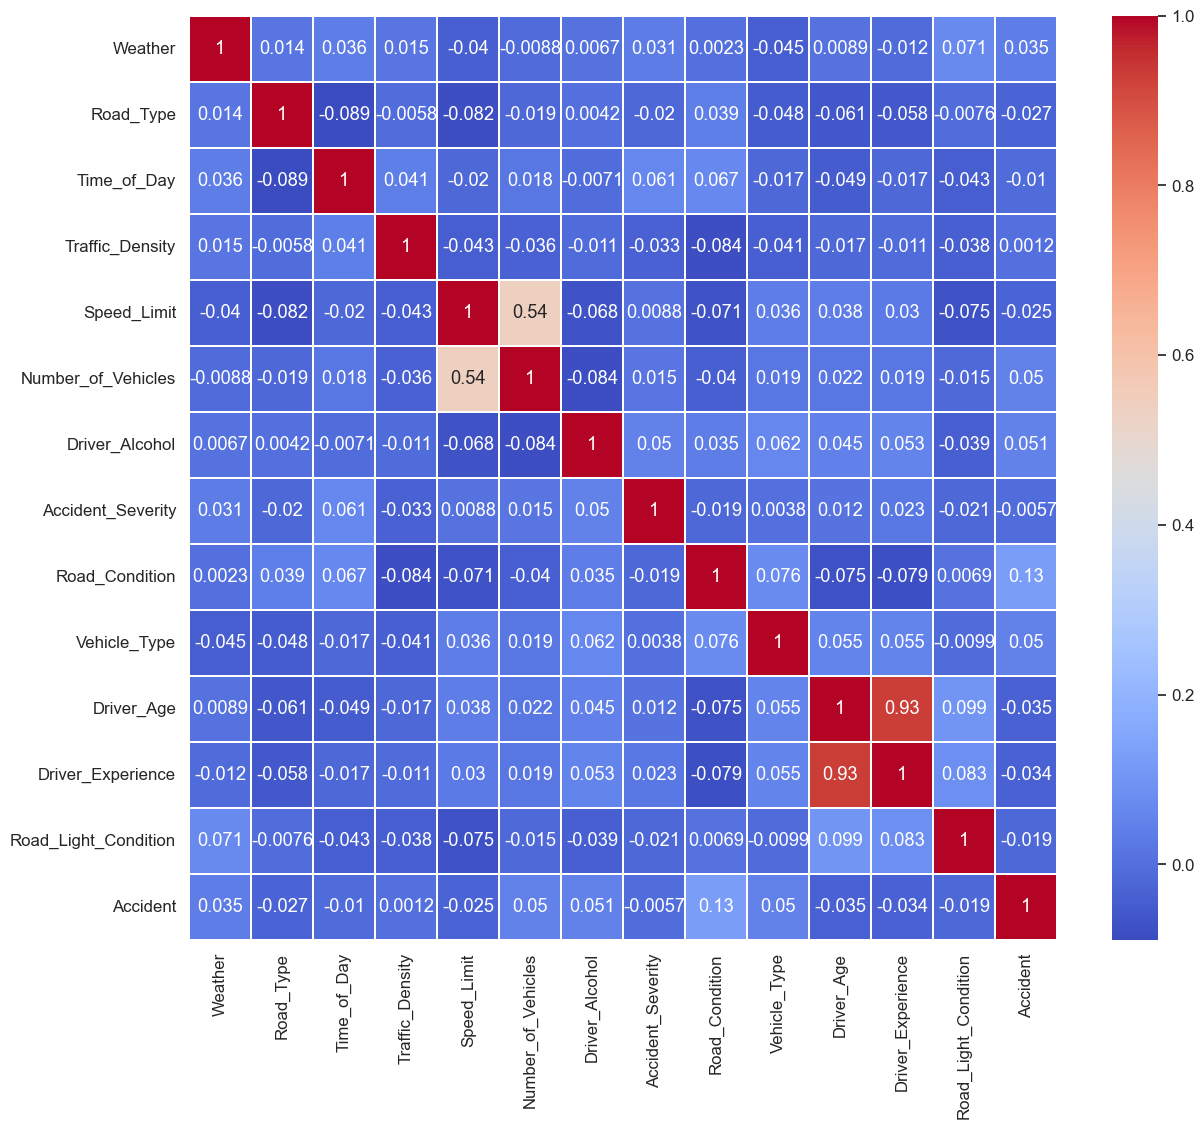

In [80]:
plt.figure(figsize=(14, 12))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', linewidths=1.1)
plt.show()

## D. Modelling

### D.1 Defining X (Feature) and y (Target) Variables

In [81]:
X_data = df.drop(columns='Accident')
y_data = df['Accident']

### D.2 Splitting Data Training and Data Testing (80:20)

In [82]:
def stratified_split(X_data, y_data, train_size=0.8, random_state=42):
    np.random.seed(random_state)

    X_train_list, X_test_list = [],[]
    y_train_list, y_test_list = [],[]
    
    for class_value in np.unique(y_data):
        class_idx = np.where(y_data==class_value)[0]
        
        idx = np.random.permutation(class_idx)
        split_ratio = int(len(idx) * train_size)
        
        X_train_list.append(X_data.iloc[idx[:split_ratio]])
        X_test_list.append(X_data.iloc[idx[split_ratio:]])
        y_train_list.append(y_data.iloc[idx[:split_ratio]])
        y_test_list.append(y_data.iloc[idx[split_ratio:]])
        
    X_train = pd.concat(X_train_list).reset_index(drop=True)
    X_test = pd.concat(X_test_list).reset_index(drop=True)
    y_train = pd.concat(y_train_list).reset_index(drop=True)
    y_test = pd.concat(y_test_list).reset_index(drop=True)
    
    return X_train, X_test, y_train, y_test

X_train, X_test, y_train, y_test = stratified_split(X_data, y_data)

In [83]:
print("Rasio Kecelakaan di Data Asli:")
print(np.mean(y_data == 1)) 

print("\nRasio Kecelakaan di Data Training (Hasil Stratified Split):")
print(np.mean(y_train == 1))

Rasio Kecelakaan di Data Asli:
0.5

Rasio Kecelakaan di Data Training (Hasil Stratified Split):
0.5


### D.3 Decision Tree :(

#### Menghitung Gini Impurity

In [84]:
def hitung_gini(groups, classes):
    # Hitung total data di split ini
    n_instances = float(sum([len(group) for group in groups]))
    gini = 0.0
    
    for group in groups:
        size = float(len(group))
        # Hindari pembagian dengan nol
        if size == 0:
            continue
        
        score = 0.0
        # Ambil kolom terakhir sebagai target (y)
        # Asumsi: Kolom target ada di posisi paling akhir
        group_y = group.iloc[:, -1]
        
        for class_val in classes:
            # Hitung proporsi (p)
            p = (group_y == class_val).sum() / size
            score += p ** 2
            
        # Rumus Gini: (1 - sum(p^2)) * bobot grup
        gini += (1.0 - score) * (size / n_instances)
        
    return gini

#### Melakukan Splitting Data

In [85]:
def split_data(df, feat_idx, threshold):
    # feat_idx: urutan kolom (0, 1, 2...)
    # threshold: nilai ambang batas
    
    # Ambil data yang nilainya KURANG DARI threshold (Kiri)
    left = df[df.iloc[:, feat_idx] < threshold]
    
    # Ambil data yang nilainya LEBIH DARI / SAMA DENGAN threshold (Kanan)
    right = df[df.iloc[:, feat_idx] >= threshold]
    
    return left, right

#### Mencari Best Split

In [86]:
def get_best_split(df, classes):
    best_gini = float('inf') # Angka awal yang besar
    best_split = {} # Dictionary untuk simpan hasil terbaik
    
    # Loop semua kolom fitur (kecuali kolom terakhir target)
    n_features = df.shape[1] - 1
    
    for feat_idx in range(n_features):
        # Loop setiap baris data untuk dijadikan kandidat threshold
        # (Ini cara sederhana, kalau data jutaan akan lambat, tapi buat 800 aman)
        for index, row in df.iterrows():
            
            # Coba split pakai nilai ini
            groups = split_data(df, feat_idx, row.iloc[feat_idx])
            
            # Hitung skor Gini-nya
            gini = hitung_gini(groups, classes)
            
            # Kalau nemu Gini yang lebih kecil (lebih murni), simpan!
            if gini < best_gini:
                best_gini = gini
                best_split = {
                    'feat_idx': feat_idx,
                    'val': row.iloc[feat_idx],
                    'groups': groups
                }
                
    return best_split

#### Membangun Pohon (Recursive)

In [87]:
# Fungsi bantuan untuk menentukan label mayoritas (voting) di daun
def to_terminal(group):
    # Ambil kolom target (terakhir), cari modus (nilai terbanyak)
    return group.iloc[:, -1].mode()[0]

# Fungsi Rekursif Utama
def build_tree(df, classes, depth, max_depth):
    # 1. Cari split terbaik untuk data saat ini
    root = get_best_split(df, classes)
    
    # Cek apakah ada split yang valid
    if not root: 
        return to_terminal(df)

    # Ambil hasil split kiri dan kanan
    left, right = root['groups']
    del(root['groups']) # Hapus datanya biar hemat memori, kita cuma butuh rules-nya
    
    # 2. Cek Kondisi Berhenti (Stop Conditions)
    # A. Jika salah satu sisi kosong (split gagal memisahkan)
    if len(left) == 0 or len(right) == 0:
        no_split_data = pd.concat([left, right])
        root['left'] = root['right'] = to_terminal(no_split_data)
        return root
    
    # B. Jika kedalaman pohon sudah maksimal
    if depth >= max_depth:
        root['left'] = to_terminal(left)
        root['right'] = to_terminal(right)
        return root

    # 3. Rekursif: Bangun lagi untuk cabang Kiri dan Kanan
    root['left'] = build_tree(left, classes, depth + 1, max_depth)
    root['right'] = build_tree(right, classes, depth + 1, max_depth)
    
    return root

#### Prediksi

In [88]:
# Prediksi untuk SATU baris data
def predict_row(node, row):
    # Kalau node ini adalah angka (hasil prediksi akhir / Leaf), langsung kembalikan
    if not isinstance(node, dict):
        return node
    
    # Kalau masih dictionary, berarti percabangan. Cek aturannya.
    if row.iloc[node['feat_idx']] < node['val']:
        # Belok Kiri
        return predict_row(node['left'], row)
    else:
        # Belok Kanan
        return predict_row(node['right'], row)

# Prediksi untuk SELURUH data test
def predict_batch(tree, df_test):
    predictions = []
    for index, row in df_test.iterrows():
        prediction = predict_row(tree, row)
        predictions.append(prediction)
    return predictions

## E. Evaluasi

### E.1 Memprediksi Hasil

In [89]:
# Persiapan Data (Gabungkan X_train dan y_train)
train_data = pd.concat([X_train, y_train], axis=1)

# Ambil daftar kelas unik (0.0 dan 1.0)
unique_classes = y_train.unique()

# Membangun Pohon
my_tree = build_tree(train_data, unique_classes, depth=0, max_depth=10)

# Memprediksi
predictions = predict_batch(my_tree, X_test)

In [90]:
# # Grid Search Manual
# best_acc = 0
# best_params = {}

# # Coba kombinasi depth 3 sampai 10, dan split 2 sampai 20
# for d in range(3, 11):
#     for s in [2, 5, 10, 20]:
#         # Latih model
#         tree = build_tree(train_data, unique_classes,depth=0 ,max_depth=d, min_samples_split=s)
        
#         # Tes akurasi
#         preds = predict_batch(tree, X_test)
#         acc = (np.array(y_test) == np.array(preds)).mean()
        
#         # Simpan kalau lebih bagus
#         if acc > best_acc:
#             best_acc = acc
#             best_params = {'depth': d, 'split': s}
#             print(f"New Best! Depth: {d}, Split: {s} -> Acc: {acc*100:.2f}%")

# print(f"\nPARAMETER TERBAIK: {best_params}")

### E.2 Akurasi

In [91]:
akurasi = (y_test == predictions).mean()
print(akurasi)

0.7181818181818181


### E.3 Confusion Matrix

In [92]:
predictions_array = np.array(predictions)
y_test_array = np.array(y_test)


TP = np.sum((predictions_array == 1) & (y_test_array == 1))
FP = np.sum((predictions_array == 1) & (y_test_array == 0))
TN = np.sum((predictions_array == 0) & (y_test_array == 0))
FN = np.sum((predictions_array == 0) & (y_test_array == 1))

print(f"True Positives: {TP}")
print(f"False Positives: {FP}")
print(f"True Negatives: {TN}")
print(f"False Negatives: {FN}")

True Positives: 98
False Positives: 50
True Negatives: 60
False Negatives: 12


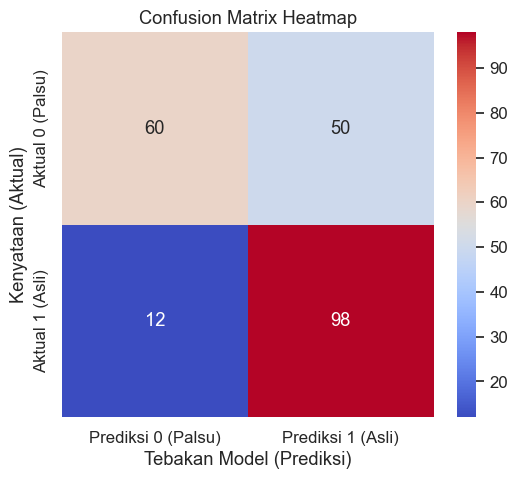

In [ ]:
cm_matrix = np.array([
    [TN, FP], 
    [FN, TP]
])

plt.figure(figsize=(6, 5))
sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='coolwarm', 
            xticklabels=['Prediksi 0 (Palsu)', 'Prediksi 1 (Asli)'],
            yticklabels=['Aktual 0 (Palsu)', 'Aktual 1 (Asli)'])

plt.ylabel('Kenyataan (Aktual)')
plt.xlabel('Tebakan Model (Prediksi)')
plt.title('Confusion Matrix Heatmap')
plt.show()

### E.4 Precision

In [94]:
precision = TP / (TP + FP)
precision

np.float64(0.6621621621621622)

### E.5 Recall

In [95]:
recall = TP / (TP + FN)
recall

np.float64(0.8909090909090909)

### E.6 F-1 Score

In [96]:
f1 = 2 * (precision * recall / precision + recall)
f1

np.float64(3.5636363636363635)

### E.7 Visualisasi Tree

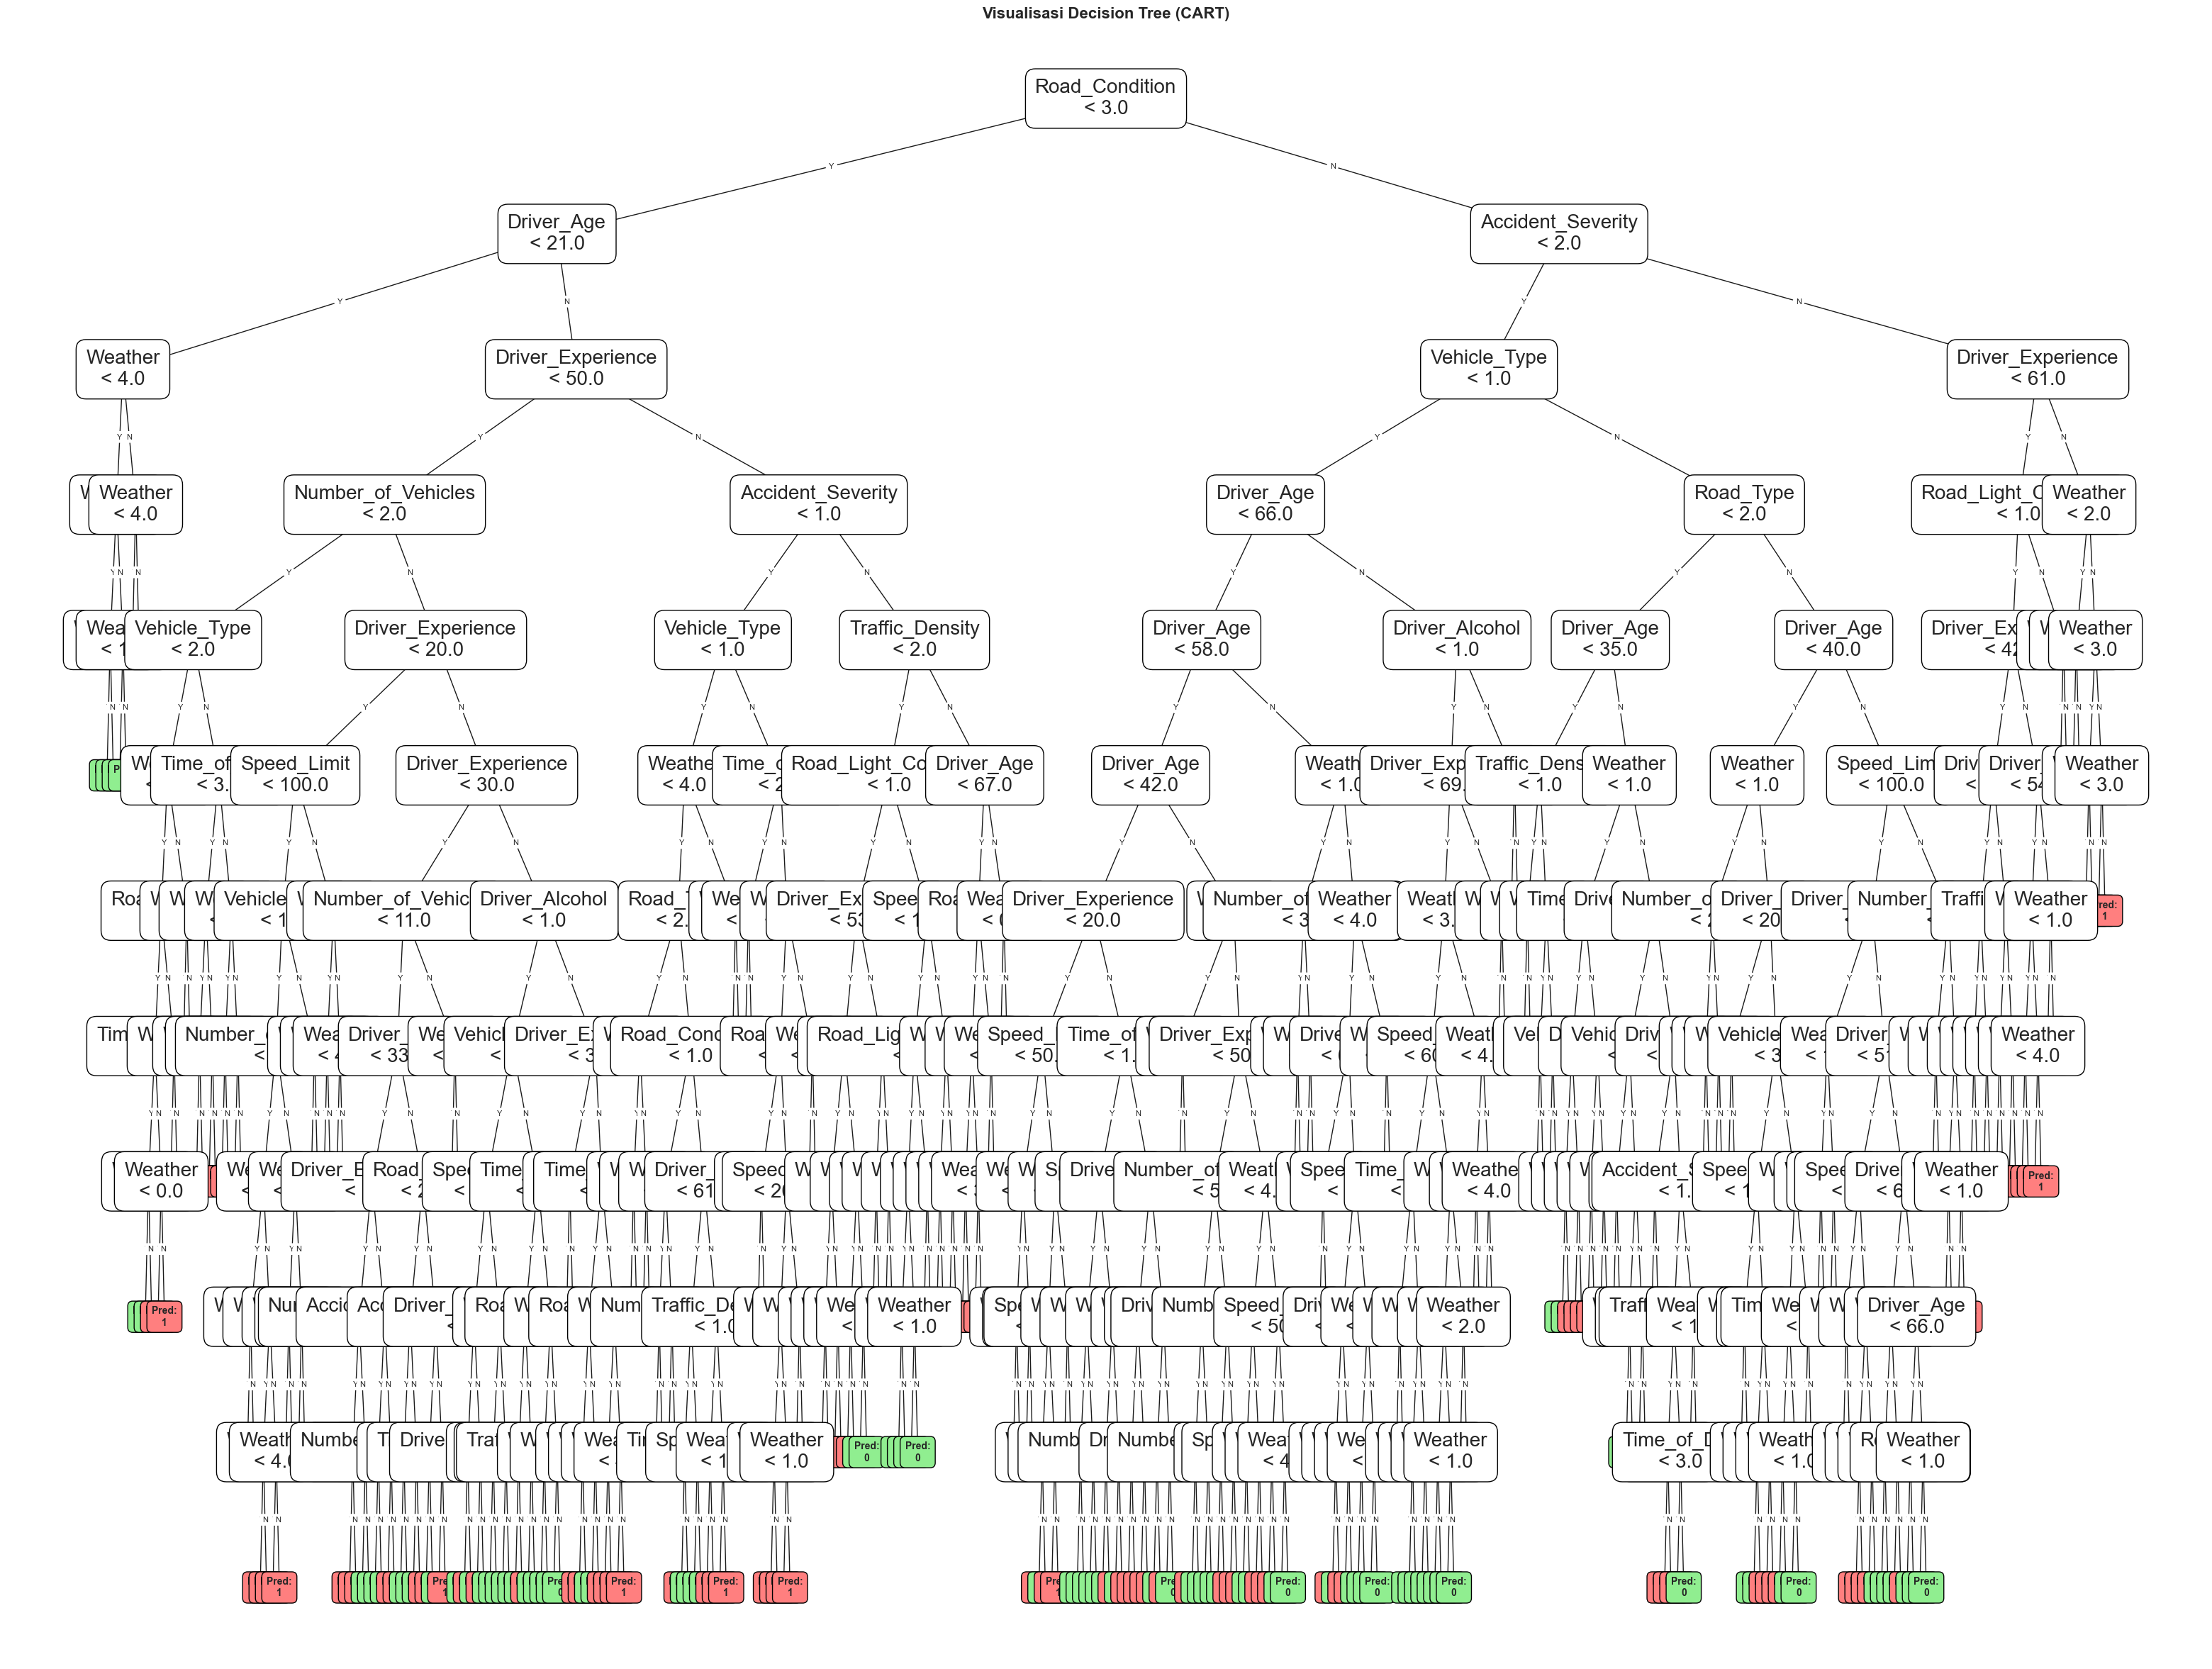

In [97]:
def get_width(node):
    if not isinstance(node, dict):
        return 1
    return get_width(node['left']) + get_width(node['right'])

# 2. Fungsi Bantu: Hitung Kedalaman Pohon
def get_depth(node):
    if not isinstance(node, dict):
        return 1
    return max(get_depth(node['left']), get_depth(node['right'])) + 1

# 3. Fungsi Utama: Menggambar Pohon
def plot_tree_visual(node, feature_names, ax=None, 
                     left_lim=0, right_lim=10, y=10, level_height=2):
    
    # Kalau kanvas belum ada, bikin baru
    if ax is None:
        fig, ax = plt.subplots(figsize=(12, 8))
        ax.axis('off') # Hilangkan sumbu X/Y biar bersih

    # --- KONDISI 1: JIKA DAUN (LEAF) ---
    if not isinstance(node, dict):
        text = f"Pred:\n{int(node)}"
        
        # Warna: Hijau untuk Aman (0), Merah untuk Kecelakaan (1)
        color = "#90EE90" if node == 0 else "#FF7F7F" 
        bbox_props = dict(boxstyle="round,pad=0.5", fc=color, ec="black", lw=1)
        
        # Gambar kotak daun tepat di tengah area yang tersedia
        ax.text((left_lim + right_lim)/2, y, text, ha="center", va="center", 
                bbox=bbox_props, fontsize=10, fontweight='bold')
        return

    # --- KONDISI 2: JIKA CABANG (INTERNAL NODE) ---
    # Hitung titik tengah untuk node ini
    mid_x = (left_lim + right_lim) / 2
    
    # Ambil info fitur
    feat_name = feature_names[node['feat_idx']]
    threshold = node['val']
    text = f"{feat_name}\n< {threshold}"
    
    # Gambar kotak keputusan (Warna Putih)
    bbox_props = dict(boxstyle="round,pad=0.5", fc="white", ec="black", lw=1)
    ax.text(mid_x, y, text, ha="center", va="center", bbox=bbox_props, fontsize=20, zorder=20)
    
    # --- LOGIKA POSISI ANAK ---
    # Kita bagi ruang horizontal berdasarkan jumlah daun anak kiri & kanan
    n_left = get_width(node['left'])
    n_right = get_width(node['right'])
    total_n = n_left + n_right
    
    # Tentukan garis pembatas area kiri dan kanan
    split_x = left_lim + (right_lim - left_lim) * (n_left / total_n)
    
    # Posisi Y anak (turun ke bawah)
    child_y = y - level_height
    
    # Titik tengah anak kiri & kanan
    left_child_x = (left_lim + split_x) / 2
    right_child_x = (split_x + right_lim) / 2
    
    # Gambar Garis ke Kiri (Yes/True)
    ax.plot([mid_x, left_child_x], [y, child_y], 'k-', lw=1)
    ax.text((mid_x + left_child_x)/2, (y + child_y)/2, "Y", 
            ha="center", va="center", fontsize=8, 
            bbox=dict(boxstyle="circle", fc="white", ec="none"))
    
    # Gambar Garis ke Kanan (No/False)
    ax.plot([mid_x, right_child_x], [y, child_y], 'k-', lw=1)
    ax.text((mid_x + right_child_x)/2, (y + child_y)/2, "N", 
            ha="center", va="center", fontsize=8, 
            bbox=dict(boxstyle="circle", fc="white", ec="none"))
    
    # --- REKURSIF: GAMBAR ANAKNYA ---
    plot_tree_visual(node['left'], feature_names, ax, left_lim, split_x, child_y, level_height)
    plot_tree_visual(node['right'], feature_names, ax, split_x, right_lim, child_y, level_height)

# --- CARA PAKAI ---
feature_names = ['Weather', 'Road_Type', 'Time_of_Day', 'Traffic_Density', 
                 'Speed_Limit', 'Number_of_Vehicles', 'Driver_Alcohol', 
                 'Accident_Severity', 'Road_Condition', 'Vehicle_Type', 
                 'Driver_Age', 'Driver_Experience', 'Road_Light_Condition']

plt.figure(figsize=(40, 30)) # Sesuaikan ukuran gambar
ax = plt.gca()
ax.axis('off')
plot_tree_visual(my_tree, feature_names, ax=ax)
plt.title("Visualisasi Decision Tree (CART)", fontsize=16, fontweight='bold')
plt.show()

### E.8 Visualisasi Decision Boundary

Melatih model mini untuk visualisasi...
Sedang memprediksi area (tunggu sebentar)...


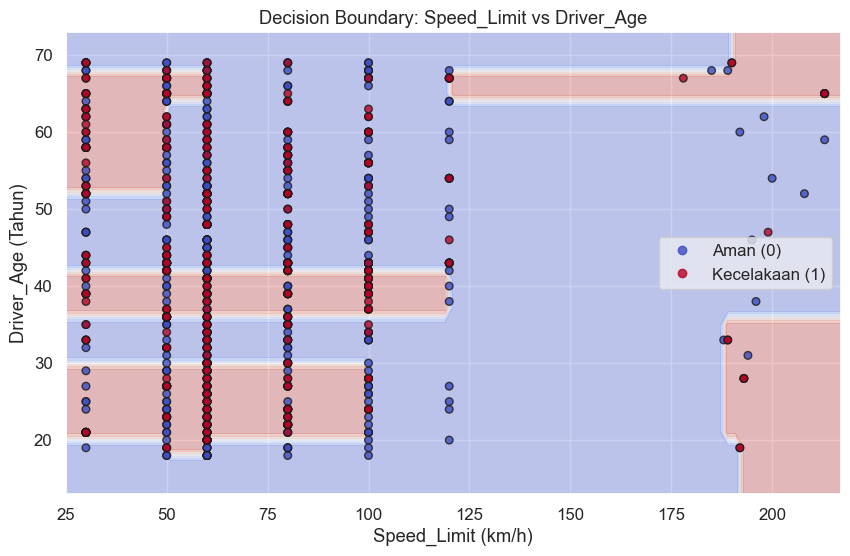

In [98]:
feat_1 = 'Speed_Limit'
feat_2 = 'Driver_Age'

# Ambil data khusus 2 kolom ini + Targetnya dari data balanced kamu
X_vis = train_data[[feat_1, feat_2]]
y_vis = train_data['Accident']
data_vis = pd.concat([X_vis, y_vis], axis=1)

print("Melatih model mini untuk visualisasi...")
# Latih pohon baru (simpel aja, depth 5) pakai fungsi buatanmu
# Pastikan 'unique_classes' sudah ada dari kode sebelumnya
tree_vis = build_tree(data_vis, unique_classes, depth=0, max_depth=5) 

# --- 2. PERSIAPAN GRID (JARING TITIK) ---
# Bikin rentang X dan Y (biar gambarnya luas mencakup semua data)
x_min, x_max = X_vis[feat_1].min() - 5, X_vis[feat_1].max() + 5
y_min, y_max = X_vis[feat_2].min() - 5, X_vis[feat_2].max() + 5

# Bikin meshgrid (titik-titik halus buat background warna)
xx, yy = np.meshgrid(np.arange(x_min, x_max, 2), # step 2 biar gak berat
                     np.arange(y_min, y_max, 2))

# --- 3. PREDIKSI AREA ---
# Siapkan data pura-pura dari grid tadi buat diprediksi
grid_data = pd.DataFrame(np.c_[xx.ravel(), yy.ravel()], columns=[feat_1, feat_2])

# Pakai fungsi prediksimu yang 'predict_batch'
print("Sedang memprediksi area (tunggu sebentar)...")
Z = predict_batch(tree_vis, grid_data) 
Z = np.array(Z).reshape(xx.shape)

# --- 4. GAMBAR HASILNYA ---
plt.figure(figsize=(10, 6))

# Gambar daerah kekuasaan (Merah vs Biru)
plt.contourf(xx, yy, Z, alpha=0.3, cmap='coolwarm')

# Gambar titik data asli (Scatter Plot)
scatter = plt.scatter(X_vis[feat_1], X_vis[feat_2], c=y_vis, 
                      s=30, edgecolor='k', cmap='coolwarm', alpha=0.8)

plt.xlabel(f'{feat_1} (km/h)')
plt.ylabel(f'{feat_2} (Tahun)')
plt.title(f'Decision Boundary: {feat_1} vs {feat_2}')
plt.legend(handles=scatter.legend_elements()[0], labels=['Aman (0)', 'Kecelakaan (1)'])
plt.show()